<img src='./img/EU-Copernicus-EUM_3Logos.png' alt='Logo EU Copernicus EUMETSAT' align='right' width='50%'></img>

# AC SAF - Data records (Level 3 products)

AC SAF Data records are monthly aggregated products (Level 3), regridded onto a regular latitude longitude grid. Data records are disseminated in the data format `netCDF`. 

Data records are processed for three parameters:

* `tropospheric ozone column`, 
* `total and tropospheric nitrogen dioxide column`, and 
* `total water vapour column`.

This notebook guides you through how the data can be loaded and gives simple plotting examples.

### Load required libraries

In [84]:
import os
import h5py
from netCDF4 import Dataset, MFDataset
import xarray as xr
import numpy as np
import pandas as pd
import datetime

# Python libraries for visualisation
from matplotlib import pyplot as plt
import cartopy.crs as ccrs

<hr>

## Load and browse AC SAF data records

[NetCDF4](https://unidata.github.io/netcdf4-python/netCDF4/index.html) and [xarray](http://xarray.pydata.org/en/stable/) are two Python libraries to load and browse data who are disseminated in the NetCDF format.

### Open NetCDF files with the `NetCDF4` library

#### Open one individual file with `NetCDF4`

A NetCDF file can simply be loaded with the `Dataset` constructor of the NetCDF4 library.

In [12]:
dataset = Dataset('../sample_data/gome2a/level3/O3tropo/GOME_O3tropo_Tropics_201801_METOPA_DLR_v1.1.nc', format='NETCDF4')
dataset

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    description: tropospheric_ozone_column data
    Conventions: CF -1.6
    dimensions(sizes): latitude(32), longitude(144)
    variables(dimensions): float32 latitude(latitude), float32 longitude(longitude)
    groups: METADATA, PRODUCT

<br>

The dataset object contains information about the general data structure of the dataset. We see that the variables of AC SAF data records are organised in `groups`, which is analogous to directories in a filesystem. 

In order to see, which variables are available in the dataset, we have to select the `PRODUCT` group of our dataset object.

In [13]:
dataset.groups['PRODUCT']

<class 'netCDF4._netCDF4.Group'>
group /PRODUCT:
    dimensions(sizes): 
    variables(dimensions): float32 tropospheric_O3(latitude,longitude), float32 tropospheric_O3_std(latitude,longitude), int32 tropospheric_O3_number(latitude,longitude), float32 tropospheric_O3_mixingratio(latitude,longitude), float32 tropospheric_O3_mixingratio_std(latitude,longitude)
    groups: SUPPORT_DATA

<br>

The file contains five variables: 
* (1) `tropospheric_O`<sub>`3`</sub>, 
* (2) `tropospheric_O`<sub>`3`</sub>`_std`, 
* (3) `tropospheric_O`<sub>`3`</sub>`_number`, 
* (4) `tropospheric_O`<sub>`3`</sub>`_mixingratio` and 
* (5) `tropospheric_O`<sub>`3`</sub>`_mixingratio_std`

We can specify one variable of interest and get more detailed information about the variable. E.g. `tropospheric_O3` is the average column tropopshere mole content of ozone, has the unit DU, which stands for Dobson Unit and is a 2D variable on a latitude longitude grid.

In [14]:
dataset.groups['PRODUCT']['tropospheric_O3']

<class 'netCDF4._netCDF4.Variable'>
float32 tropospheric_O3(latitude, longitude)
    _FillValue: 9.96921e+36
    least_significant_digit: 2
    vertical_range_bottom: surface
    standard_name: troposphere_mole_content_of_ozone
    long_name: average column troposphere_mole_content_of_ozone
    units: DU
    vertical_range_top: 10_km
path = /PRODUCT
unlimited dimensions: 
current shape = (32, 144)
filling on

<br>

If we want to access the data values, we can retrieve it by indicating `[:]` - that means that we want to access the data array directly. We can do this for the variables, but also for the dimensions `latitude` and `longitude`.

We see that the `latitude` coordinates range between 19.375 N and -19.375 S and the `longitude` coordinates range between -178.75 W to 178.75 E.

In [15]:
o3 = dataset.groups['PRODUCT']['tropospheric_O3'][:]
lat = dataset['latitude'][:]
lon = dataset['longitude'][:]

o3, lat, lon

(masked_array(
   data=[[22.5078125, 23.8515625, 23.3984375, ..., 22.03125, 23.640625,
          24.3515625],
         [21.6015625, 22.2890625, 23.7109375, ..., 19.8046875, 22.75,
          25.3828125],
         [19.9609375, 19.1640625, 20.78125, ..., 16.7421875, 19.6875,
          22.0390625],
         ...,
         [--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --]],
   mask=[[False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         ...,
         [ True,  True,  True, ...,  True,  True,  True],
         [ True,  True,  True, ...,  True,  True,  True],
         [ True,  True,  True, ...,  True,  True,  True]],
   fill_value=9.96921e+36,
   dtype=float32),
 masked_array(data=[-19.375, -18.125, -16.875, -15.625, -14.375, -13.125,
                    -11.875, -10.625,  -9.375,  -8.125,  -6.875,  -5.625,
            

<br>

### Open NetCDF files with `xarray`

#### Open one individual file with `xarray`

By using xarray's `open_dataset()` function, a `netCDF` file can be loaded to create a new xarray `Dataset`. We can have a look at the resulting `Dataset` and the latitude and longitude coordinates.

In [133]:
ds = xr.open_dataset('../sample_data/gome2b/level3/NO2/GOME_NO2_Global_201701_METOPB_DLR_v1.nc')
ds, ds.latitude, ds.longitude

(<xarray.Dataset>
 Dimensions:    (latitude: 720, longitude: 1440)
 Coordinates:
   * latitude   (latitude) float32 -89.875 -89.625 -89.375 ... 89.625 89.875
   * longitude  (longitude) float32 -179.875 -179.625 ... 179.625 179.875
 Data variables:
     *empty*
 Attributes:
     description:  Level 3 NO2 data
     Conventions:  CF-1.6, <xarray.DataArray 'latitude' (latitude: 720)>
 array([-89.875, -89.625, -89.375, ...,  89.375,  89.625,  89.875],
       dtype=float32)
 Coordinates:
   * latitude  (latitude) float32 -89.875 -89.625 -89.375 ... 89.625 89.875
 Attributes:
     standard_name:  latitude
     long_name:      latitude_Centre, center of the grid box
     units:          degrees_north, <xarray.DataArray 'longitude' (longitude: 1440)>
 array([-179.875, -179.625, -179.375, ...,  179.375,  179.625,  179.875],
       dtype=float32)
 Coordinates:
   * longitude  (longitude) float32 -179.875 -179.625 ... 179.625 179.875
 Attributes:
     standard_name:  longitude
     long_name:    

<br>

We see that the `data variable` section is empty. This is due to the internal structure of the AC SAF data. The data is organised in groups within the `netCDF` file. To load from a group, we have to pass the `group` keyword to the `open_dataset()` function. 

We see that the `Dataset` contains five data variables:

* (1) `tropospheric_O`<sub>`3`</sub>, 
* (2) `tropospheric_O`<sub>`3`</sub>`_std`, 
* (3) `tropospheric_O`<sub>`3`</sub>`_number`, 
* (4) `tropospheric_O`<sub>`3`</sub>`_mixingratio` and 
* (5) `tropospheric_O`<sub>`3`</sub>`_mixingratio_std`.

However, `latitude` and `longitude` do not contain any coordinates.

In [134]:
var = xr.open_dataset('../sample_data/gome2b/level3/NO2/GOME_NO2_Global_201701_METOPB_DLR_v1.nc', group='PRODUCT')
var, var.latitude, var.longitude

(<xarray.Dataset>
 Dimensions:          (latitude: 720, longitude: 1440)
 Dimensions without coordinates: latitude, longitude
 Data variables:
     NO2total         (latitude, longitude) float32 ...
     NO2total_err     (latitude, longitude) float32 ...
     NO2total_stddev  (latitude, longitude) float32 ...
     NO2trop          (latitude, longitude) float32 ...
     NO2trop_err      (latitude, longitude) float32 ...
     NO2trop_stddev   (latitude, longitude) float32 ...
     nobs             (latitude, longitude) float32 ...,
 <xarray.DataArray 'latitude' (latitude: 720)>
 array([  0,   1,   2, ..., 717, 718, 719])
 Dimensions without coordinates: latitude,
 <xarray.DataArray 'longitude' (longitude: 1440)>
 array([   0,    1,    2, ..., 1437, 1438, 1439])
 Dimensions without coordinates: longitude)

<br>

We can assign the coordinate values from our dataset to the dimensions of our group dataset, with xarray's `assign_coords` function.

In [135]:
var_assigned = var.assign_coords(latitude=ds.latitude, longitude=ds.longitude)
var_assigned

<xarray.Dataset>
Dimensions:          (latitude: 720, longitude: 1440)
Coordinates:
  * latitude         (latitude) float32 -89.875 -89.625 ... 89.625 89.875
  * longitude        (longitude) float32 -179.875 -179.625 ... 179.625 179.875
Data variables:
    NO2total         (latitude, longitude) float32 ...
    NO2total_err     (latitude, longitude) float32 ...
    NO2total_stddev  (latitude, longitude) float32 ...
    NO2trop          (latitude, longitude) float32 ...
    NO2trop_err      (latitude, longitude) float32 ...
    NO2trop_stddev   (latitude, longitude) float32 ...
    nobs             (latitude, longitude) float32 ...

<br>

#### Open multiple netCDF files with `xarray`

xarray's `open_mfdataset` function is very useful to load multiple netCDF simultaneously. This function automatically concatenates and merges multiple files into a single xarray dataset. The behaviour of `open_mfdataset` is the same as the one of `open_dataset`. In order to access the dataset variables, we have to specify the `group` parameter. 

Additionally, if the dimension one want to concatenate the individual files is not defined in the original datasets, a new dimension can be defined by specifying the `concat_dim` key.

In [102]:
mf_dataset = xr.open_mfdataset('../sample_data/gome2b/level3/NO2/*.nc', concat_dim='time',  group='PRODUCT')
mf_dataset

<xarray.Dataset>
Dimensions:          (latitude: 720, longitude: 1440, time: 11)
Dimensions without coordinates: latitude, longitude, time
Data variables:
    NO2total         (time, latitude, longitude) float32 dask.array<shape=(11, 720, 1440), chunksize=(1, 720, 1440)>
    NO2total_err     (time, latitude, longitude) float32 dask.array<shape=(11, 720, 1440), chunksize=(1, 720, 1440)>
    NO2total_stddev  (time, latitude, longitude) float32 dask.array<shape=(11, 720, 1440), chunksize=(1, 720, 1440)>
    NO2trop          (time, latitude, longitude) float32 dask.array<shape=(11, 720, 1440), chunksize=(1, 720, 1440)>
    NO2trop_err      (time, latitude, longitude) float32 dask.array<shape=(11, 720, 1440), chunksize=(1, 720, 1440)>
    NO2trop_stddev   (time, latitude, longitude) float32 dask.array<shape=(11, 720, 1440), chunksize=(1, 720, 1440)>
    nobs             (time, latitude, longitude) float32 dask.array<shape=(11, 720, 1440), chunksize=(1, 720, 1440)>

<br>

The resulting `Dataset` has three dimensions (`latitude`, `longitude` and `time`). With `assign_coords` we can assign the right coordinate values to the dimensions. We can use again the `data` Dataset we defined at the beginning. 

With the help of Python's [pandas](https://pandas.pydata.org/) library, we can create efficiently a list of monthly time values, which we can be assigned to the time dimension.

In [103]:
# Build list of time coordinates with pandas
time_coords = pd.date_range('2018-01', '2018-11', freq='MS').strftime("%Y-%m").tolist()

# Assign values to Dataset dimension
mf_dataset_assigned = mf_dataset.assign_coords(latitude=ds.latitude, longitude=ds.longitude, time=time_coords)
mf_dataset_assigned

<xarray.Dataset>
Dimensions:          (latitude: 720, longitude: 1440, time: 11)
Coordinates:
  * latitude         (latitude) float32 -89.875 -89.625 ... 89.625 89.875
  * longitude        (longitude) float32 -179.875 -179.625 ... 179.625 179.875
  * time             (time) <U7 '2018-01' '2018-02' ... '2018-10' '2018-11'
Data variables:
    NO2total         (time, latitude, longitude) float32 dask.array<shape=(11, 720, 1440), chunksize=(1, 720, 1440)>
    NO2total_err     (time, latitude, longitude) float32 dask.array<shape=(11, 720, 1440), chunksize=(1, 720, 1440)>
    NO2total_stddev  (time, latitude, longitude) float32 dask.array<shape=(11, 720, 1440), chunksize=(1, 720, 1440)>
    NO2trop          (time, latitude, longitude) float32 dask.array<shape=(11, 720, 1440), chunksize=(1, 720, 1440)>
    NO2trop_err      (time, latitude, longitude) float32 dask.array<shape=(11, 720, 1440), chunksize=(1, 720, 1440)>
    NO2trop_stddev   (time, latitude, longitude) float32 dask.array<shape=(1

<br>

## Plotting example of AC SAF Level 3 data

### Plot `Dataset NetCDF` library object with `matplotlib` and `cartopy`

The retrieve `data array` from the `Dataset NetCDF` object is of type `numpy.MaskedArray`, which can be plotted with matplotlib's `imshow` function. The plot extent can be set with minimum and maximum values of the `latitude` and `longitude` information respectively.

We create a basemap with a `PlateCarree` projection and add coast- and gridlines.

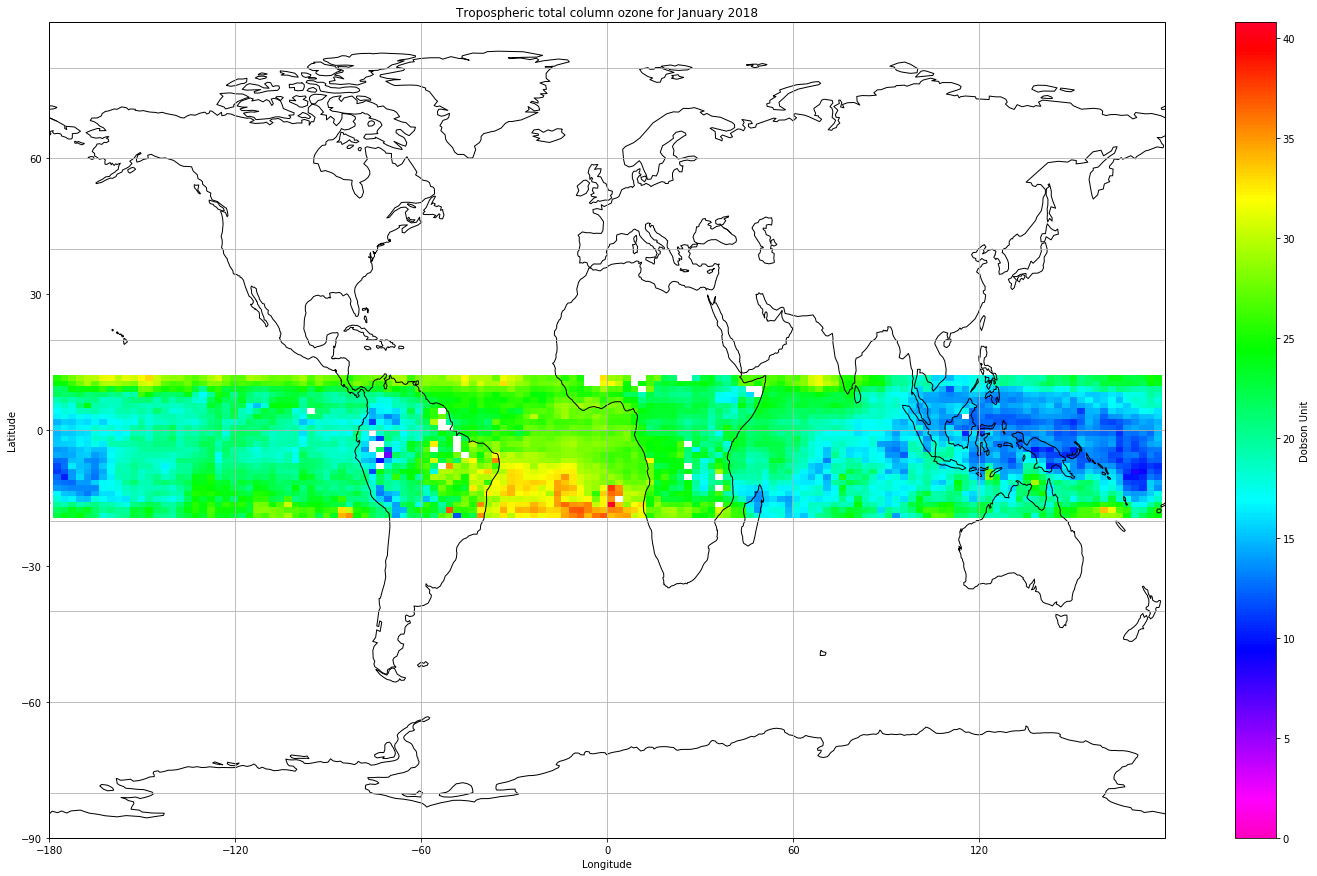

In [71]:
fig=plt.figure(figsize=(25, 15))

ax=plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.gridlines()
ax.set_global()
ax.set_title('Tropospheric total column ozone for January 2018')



plt.xticks(np.arange(-180, 180,60))
plt.yticks(np.arange(-90,90,30))
plt.xlabel("Longitude")
plt.ylabel("Latitude")

img1 = plt.imshow(o3,
           extent=[min(lon),max(lon),max(lat),min(lat)],
           cmap='gist_rainbow_r',
           aspect='auto',
           vmin=0,
           vmax=o3.max())

cb = fig.colorbar(img1)
cb.set_label('Dobson Unit', labelpad=5, y=0.5)

<br>

### Plot xarray `Dataset` object with `matplotlib` and `cartopy`

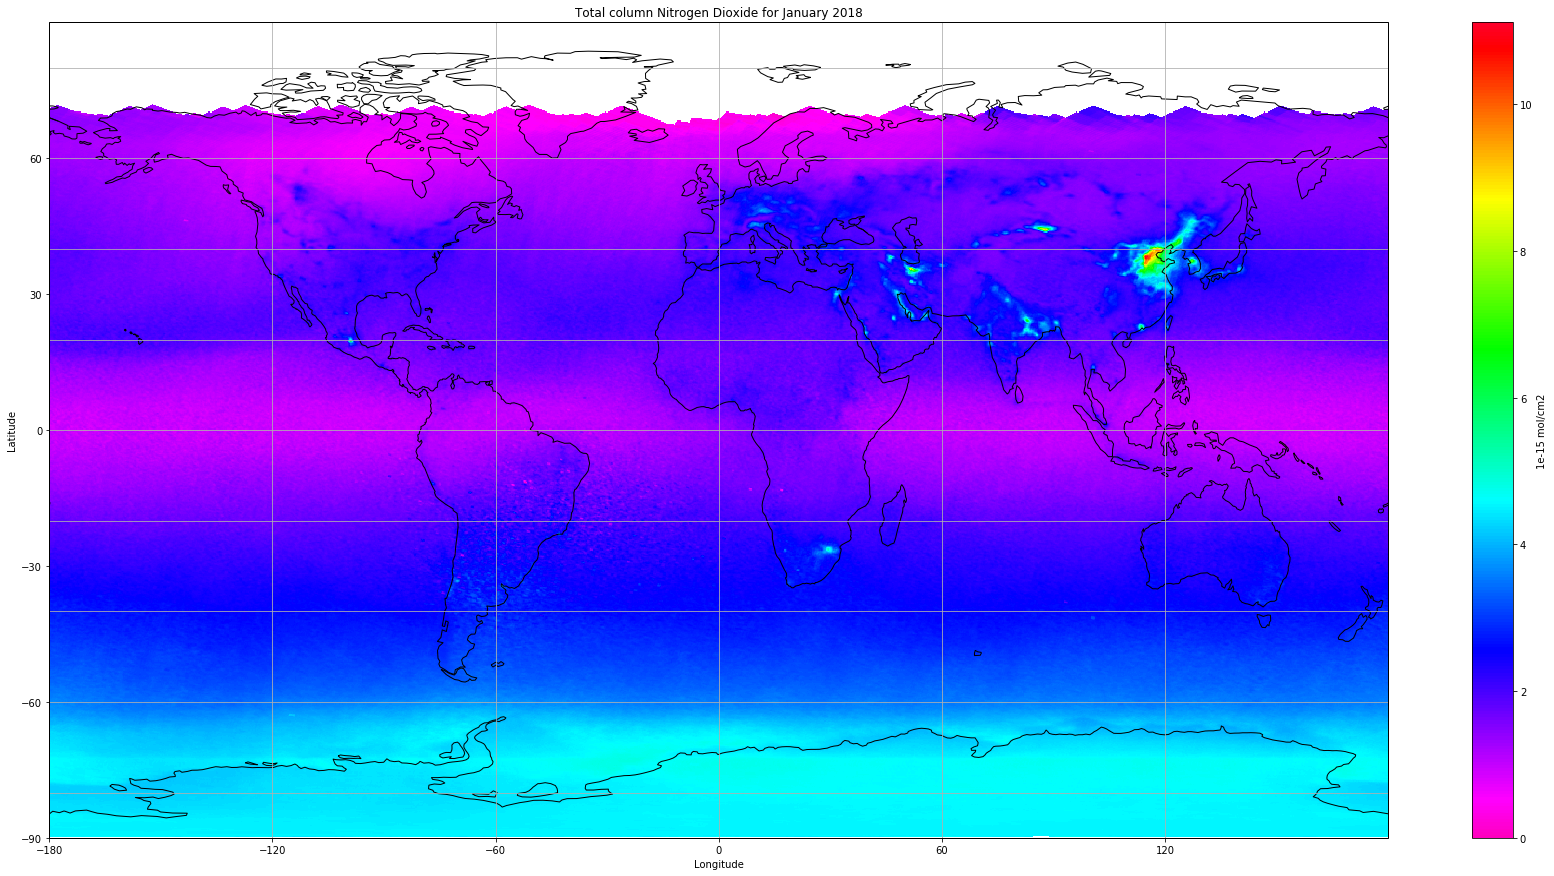

In [136]:
fig=plt.figure(figsize=(30, 15))

ax=plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.gridlines()
ax.set_global()
ax.set_title('Total column Nitrogen Dioxide for January 2018')

plt.xticks(np.arange(-180, 180,60))
plt.yticks(np.arange(-90,90,30))
plt.xlabel("Longitude")
plt.ylabel("Latitude")

no2 = var_assigned.NO2total*1e-15

img1 = plt.imshow(no2,
           extent=[no2.longitude.min(),no2.longitude.max(),no2.latitude.max(),no2.latitude.min()],
           cmap='gist_rainbow_r',
           aspect='auto',
           vmin=0,
           vmax=no2.max())

cb = fig.colorbar(img1)
cb.set_label('1e-15 mol/cm2', labelpad=5, y=0.5)

<hr>

<p style="text-align:left;"><a href="https://gitlab.eumetsat.int/eo-lab/training-atmospheric-composition/blob/master/LICENSE">&copy; Copyright 2019 eo-lab</a> <span style="float:right;">View on GitLab | Cite | Contact</span></p>